In [1]:
import pandas as pd
import librosa
from tqdm import notebook as tq
from pylab import rcParams
import os
import json
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/cri98/Downloads/fma_large/' #Per rimuovere i file dalle cartelle: find . -name "*.mp3" -exec mv {} . \;
entries = os.listdir(path)

In [4]:
from pydub import AudioSegment

def estraiLista(start, stop): #start incluso, stop escluso
    for entry in tq.tqdm(entries[start:stop]): #per 199 elementi ci mette 63s single thread
        sound = AudioSegment.from_mp3(path+entry)
        entryWAV = entry.replace(".mp3", ".wav")
        sound.export(entryWAV, format="wav", parameters=["-ar", "22050", "-ac", "1"]) #Senza path, salvo in locale

        y, sr = librosa.load(entryWAV, sr=22050)
        duration = librosa.get_duration(y=y, sr=sr)
        id_ = entry.replace('.mp3','')
        id_ = int(id_)
        ts[id_]= { "features":y.tolist(), "duration":duration}
        
        os.remove(entryWAV)

        
        

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series

def estraiListaDataframe(start, stop): #start incluso, stop escluso
    f = open("nostre_features/"+str(start)+"-"+str(stop)+".csv.", "wt", 1024*1024*256)
    f.write("id,error,duration")
    n_seg = 1292
    
    for i in range(n_seg):
        f.write(","+str(i))
    f.write("\n")
    
    for entry in tq.tqdm(entries[start:stop]):
        strings = []
        try:
            sound = AudioSegment.from_mp3(path+entry)
            entryWAV = entry.replace(".mp3", ".wav")
            sound.export(entryWAV, format="wav", parameters=["-ar", "22050", "-ac", "1"])

            y, sr = librosa.load(entryWAV, sr=22050, mono=True)

            os.remove(entryWAV)

            #ts_ = scaler.fit_transform(y.reshape(1,-1))

            rms = librosa.feature.rms(y, frame_length=1024, hop_length=512)[0]


            duration = librosa.get_duration(y=y, sr=sr)
            id_ = entry.replace('.mp3','')
            strings.append("%s,%d,%f" % (id_, 0, duration))

            for i in range(n_seg):
                strings.append(",")
                if i >= len(rms):
                    strings.append("0.0")
                else: 
                    strings.append(str(rms[i]))

            strings.append("\n")

            f.write(''.join(strings))
        except:
            pass
        
    
    f.close()
    #pd.DataFrame.from_dict(ts, "index").to_csv(str(start)+"-"+str(stop)+".csv.zip", compression="zip")

In [5]:
from concurrent.futures import ThreadPoolExecutor

executor = ThreadPoolExecutor(24)

n_split = 24;

intervalli = range(0, len(entries), int(len(entries)/n_split))

df_list = list()
ts = dict()
future = {}
for i in range(len(intervalli) -1):
    future[i] = executor.submit(estraiListaDataframe, intervalli[i], intervalli[i+1])

future[i+1] = executor.submit(estraiListaDataframe,  intervalli[i+1], len(entries))

executor.shutdown(wait=True)


In [5]:
df_result = pd.DataFrame.from_dict(ts, "index")
ts = {}

In [6]:
df_result.to_csv("test.csv.zip", compression="zip")

In [7]:
intervalli = range(0, len(entries), int(len(entries)/12))


In [8]:
list(intervalli)

[0,
 8881,
 17762,
 26643,
 35524,
 44405,
 53286,
 62167,
 71048,
 79929,
 88810,
 97691,
 106572]

In [4]:
estraiListaDataframe(0, 1000)


In [24]:
ts_sax1d

{}

In [5]:
df_result = pd.DataFrame.from_dict(ts, "index")

In [6]:
df_result

""


In [14]:
df_result.to_csv("test.csv.zip", compression="zip")

In [16]:
import json
with open('data.json', 'w') as f: #PEr 200 canzoni sono 1.2GB
    json.dump(ts, f)

KeyboardInterrupt: 

In [5]:
import pickle


with open('data.pickle', 'wb') as handle:
    pickle.dump(ts, handle, protocol=pickle.HIGHEST_PROTOCOL) #da provare il protocol=2

print("fatto")

fatto


In [6]:
len(ts[2]["features"])

29977

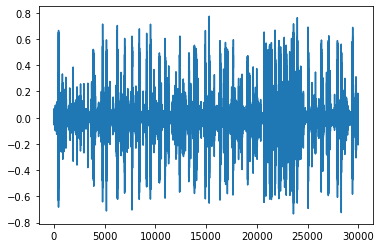

In [10]:
plt.plot(ts[2]["features"])

In [17]:
df = pd.DataFrame(list(a.items()),columns = ['column1',['column2', "column3"]]) 

In [18]:
df

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

In [6]:
for entry in tqdm(entries):
    print(entry)
    y, sr = librosa.load(path + entry)
    duration = librosa.get_duration(y=y, sr=sr)
    id_ = entry.replace('.mp3','')
    id_ = int(id_)
    ts[id_]= { "features":y.tolist(), "duration":duration}

  0%|                                                                                          | 0/199 [00:00<?, ?it/s]

000002.mp3


  1%|▍                                                                                 | 1/199 [00:02<07:05,  2.15s/it]C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


000003.mp3


  1%|▊                                                                                 | 2/199 [00:03<05:19,  1.62s/it]

000005.mp3


  2%|█▏                                                                                | 3/199 [00:04<04:43,  1.45s/it]

000010.mp3


  2%|█▋                                                                                | 4/199 [00:05<04:23,  1.35s/it]

000134.mp3


  3%|██                                                                                | 5/199 [00:06<04:05,  1.27s/it]

000136.mp3


  3%|██▍                                                                               | 6/199 [00:08<04:17,  1.33s/it]

000139.mp3


  4%|██▉                                                                               | 7/199 [00:09<04:24,  1.38s/it]

000140.mp3


  4%|███▎                                                                              | 8/199 [00:11<04:16,  1.34s/it]

000141.mp3


  5%|███▋                                                                              | 9/199 [00:12<04:07,  1.30s/it]

000148.mp3


  5%|████                                                                             | 10/199 [00:13<04:08,  1.31s/it]

000181.mp3


  6%|████▍                                                                            | 11/199 [00:15<04:12,  1.34s/it]

000182.mp3


  6%|████▉                                                                            | 12/199 [00:16<04:05,  1.31s/it]

000190.mp3


  7%|█████▎                                                                           | 13/199 [00:17<04:06,  1.33s/it]

000193.mp3


  7%|█████▋                                                                           | 14/199 [00:19<04:09,  1.35s/it]

000194.mp3


  8%|██████                                                                           | 15/199 [00:20<04:05,  1.33s/it]

000197.mp3


  8%|██████▌                                                                          | 16/199 [00:21<04:14,  1.39s/it]

000198.mp3


  9%|██████▉                                                                          | 17/199 [00:23<04:14,  1.40s/it]

000200.mp3


  9%|███████▎                                                                         | 18/199 [00:24<04:04,  1.35s/it]

000203.mp3


 10%|███████▋                                                                         | 19/199 [00:25<04:00,  1.34s/it]

000204.mp3


 10%|████████▏                                                                        | 20/199 [00:27<03:50,  1.29s/it]

000207.mp3


 11%|████████▌                                                                        | 21/199 [00:28<03:45,  1.27s/it]

000208.mp3


 11%|████████▉                                                                        | 22/199 [00:29<03:54,  1.32s/it]

000209.mp3


 12%|█████████▎                                                                       | 23/199 [00:31<04:03,  1.38s/it]

000210.mp3


 12%|█████████▊                                                                       | 24/199 [00:32<03:54,  1.34s/it]

000211.mp3


 13%|██████████▏                                                                      | 25/199 [00:33<03:48,  1.31s/it]

000212.mp3


 13%|██████████▌                                                                      | 26/199 [00:35<03:56,  1.37s/it]

000213.mp3


 14%|██████████▉                                                                      | 27/199 [00:36<04:03,  1.42s/it]

000237.mp3


 14%|███████████▍                                                                     | 28/199 [00:38<04:04,  1.43s/it]

000247.mp3


 15%|███████████▊                                                                     | 29/199 [00:39<03:57,  1.40s/it]

000249.mp3


 15%|████████████▏                                                                    | 30/199 [00:40<03:56,  1.40s/it]

000255.mp3


 16%|████████████▌                                                                    | 31/199 [00:42<03:46,  1.35s/it]

000256.mp3


 16%|█████████████                                                                    | 32/199 [00:43<03:48,  1.37s/it]

000257.mp3


 17%|█████████████▍                                                                   | 33/199 [00:45<03:53,  1.40s/it]

000258.mp3


 17%|█████████████▊                                                                   | 34/199 [00:46<03:51,  1.40s/it]

000341.mp3


 18%|██████████████▏                                                                  | 35/199 [00:47<03:50,  1.40s/it]

000343.mp3


 18%|██████████████▋                                                                  | 36/199 [00:49<03:47,  1.39s/it]

000352.mp3


 19%|███████████████                                                                  | 37/199 [00:50<03:46,  1.40s/it]

000368.mp3


 19%|███████████████▍                                                                 | 38/199 [00:51<03:39,  1.37s/it]

000369.mp3


 20%|███████████████▊                                                                 | 39/199 [00:53<03:40,  1.38s/it]

000397.mp3


 20%|████████████████▎                                                                | 40/199 [00:54<03:39,  1.38s/it]

000398.mp3


 21%|████████████████▋                                                                | 41/199 [00:56<03:43,  1.41s/it]

000399.mp3


 21%|█████████████████                                                                | 42/199 [00:57<03:42,  1.42s/it]

000400.mp3


 22%|█████████████████▌                                                               | 43/199 [00:59<03:41,  1.42s/it]

000405.mp3


 22%|█████████████████▉                                                               | 44/199 [01:00<03:39,  1.42s/it]

000414.mp3


 23%|██████████████████▎                                                              | 45/199 [01:01<03:34,  1.39s/it]

000424.mp3


 23%|██████████████████▋                                                              | 46/199 [01:03<03:31,  1.38s/it]

000425.mp3


 24%|███████████████████▏                                                             | 47/199 [01:04<03:21,  1.33s/it]

000458.mp3


 24%|███████████████████▌                                                             | 48/199 [01:05<03:14,  1.29s/it]

000459.mp3


 25%|███████████████████▉                                                             | 49/199 [01:06<03:09,  1.26s/it]

000512.mp3


 25%|████████████████████▎                                                            | 50/199 [01:07<03:04,  1.24s/it]

000534.mp3


 26%|████████████████████▊                                                            | 51/199 [01:09<03:03,  1.24s/it]

000535.mp3


 26%|█████████████████████▏                                                           | 52/199 [01:10<03:01,  1.23s/it]

000536.mp3


 27%|█████████████████████▌                                                           | 53/199 [01:11<02:55,  1.20s/it]

000537.mp3


 27%|█████████████████████▉                                                           | 54/199 [01:12<02:55,  1.21s/it]

000540.mp3


 28%|██████████████████████▍                                                          | 55/199 [01:14<02:54,  1.21s/it]

000546.mp3


 28%|██████████████████████▊                                                          | 56/199 [01:15<02:54,  1.22s/it]

000550.mp3


 29%|███████████████████████▏                                                         | 57/199 [01:16<02:57,  1.25s/it]

000564.mp3


 29%|███████████████████████▌                                                         | 58/199 [01:17<02:58,  1.27s/it]

000573.mp3


 30%|████████████████████████                                                         | 59/199 [01:19<02:56,  1.26s/it]

000574.mp3


 30%|████████████████████████▍                                                        | 60/199 [01:20<03:04,  1.33s/it]

000583.mp3


 31%|████████████████████████▊                                                        | 61/199 [01:21<03:00,  1.31s/it]

000584.mp3


 31%|█████████████████████████▏                                                       | 62/199 [01:23<02:57,  1.29s/it]

000585.mp3


 32%|█████████████████████████▋                                                       | 63/199 [01:24<02:57,  1.30s/it]

000590.mp3


 32%|██████████████████████████                                                       | 64/199 [01:25<02:52,  1.28s/it]

000591.mp3


 33%|██████████████████████████▍                                                      | 65/199 [01:26<02:44,  1.23s/it]

000592.mp3


 33%|██████████████████████████▊                                                      | 66/199 [01:28<02:49,  1.28s/it]

000593.mp3


 34%|███████████████████████████▎                                                     | 67/199 [01:29<02:46,  1.26s/it]

000602.mp3


 34%|███████████████████████████▋                                                     | 68/199 [01:30<02:43,  1.25s/it]

000603.mp3


 35%|████████████████████████████                                                     | 69/199 [01:31<02:41,  1.25s/it]

000605.mp3


 35%|████████████████████████████▍                                                    | 70/199 [01:33<02:36,  1.22s/it]

000608.mp3


 36%|████████████████████████████▉                                                    | 71/199 [01:34<02:33,  1.20s/it]

000615.mp3


 36%|█████████████████████████████▎                                                   | 72/199 [01:35<02:32,  1.20s/it]

000619.mp3


 37%|█████████████████████████████▋                                                   | 73/199 [01:36<02:32,  1.21s/it]

000620.mp3


 37%|██████████████████████████████                                                   | 74/199 [01:37<02:34,  1.24s/it]

000621.mp3


 38%|██████████████████████████████▌                                                  | 75/199 [01:39<02:41,  1.30s/it]

000625.mp3


 38%|██████████████████████████████▉                                                  | 76/199 [01:40<02:44,  1.34s/it]

000629.mp3


 39%|███████████████████████████████▎                                                 | 77/199 [01:42<02:48,  1.38s/it]

000631.mp3


 39%|███████████████████████████████▋                                                 | 78/199 [01:43<02:41,  1.33s/it]

000633.mp3


 40%|████████████████████████████████▏                                                | 79/199 [01:44<02:35,  1.30s/it]

000635.mp3


 40%|████████████████████████████████▌                                                | 80/199 [01:45<02:28,  1.24s/it]

000664.mp3


 41%|████████████████████████████████▉                                                | 81/199 [01:47<02:32,  1.29s/it]

000665.mp3


 41%|█████████████████████████████████▍                                               | 82/199 [01:48<02:32,  1.30s/it]

000666.mp3


 42%|█████████████████████████████████▊                                               | 83/199 [01:49<02:32,  1.32s/it]

000667.mp3


 42%|██████████████████████████████████▏                                              | 84/199 [01:51<02:36,  1.36s/it]

000668.mp3


 43%|██████████████████████████████████▌                                              | 85/199 [01:52<02:40,  1.41s/it]

000669.mp3


 43%|███████████████████████████████████                                              | 86/199 [01:54<02:38,  1.40s/it]

000672.mp3


 44%|███████████████████████████████████▍                                             | 87/199 [01:55<02:36,  1.40s/it]

000673.mp3


 44%|███████████████████████████████████▊                                             | 88/199 [01:56<02:29,  1.35s/it]

000674.mp3


 45%|████████████████████████████████████▏                                            | 89/199 [01:58<02:30,  1.37s/it]

000676.mp3


 45%|████████████████████████████████████▋                                            | 90/199 [01:59<02:22,  1.31s/it]

000677.mp3


 46%|█████████████████████████████████████                                            | 91/199 [02:00<02:25,  1.35s/it]

000679.mp3


 46%|█████████████████████████████████████▍                                           | 92/199 [02:02<02:23,  1.34s/it]

000680.mp3


 47%|█████████████████████████████████████▊                                           | 93/199 [02:03<02:26,  1.38s/it]

000681.mp3


 47%|██████████████████████████████████████▎                                          | 94/199 [02:04<02:22,  1.36s/it]

000684.mp3


 48%|██████████████████████████████████████▋                                          | 95/199 [02:06<02:18,  1.33s/it]

000686.mp3


 48%|███████████████████████████████████████                                          | 96/199 [02:07<02:13,  1.30s/it]

000690.mp3


 49%|███████████████████████████████████████▍                                         | 97/199 [02:08<02:09,  1.27s/it]

000694.mp3


 49%|███████████████████████████████████████▉                                         | 98/199 [02:09<02:07,  1.26s/it]

000695.mp3


 50%|████████████████████████████████████████▎                                        | 99/199 [02:11<02:04,  1.25s/it]

000696.mp3


 50%|████████████████████████████████████████▏                                       | 100/199 [02:12<01:59,  1.21s/it]

000698.mp3


 51%|████████████████████████████████████████▌                                       | 101/199 [02:13<01:59,  1.22s/it]

000701.mp3


 51%|█████████████████████████████████████████                                       | 102/199 [02:14<02:00,  1.25s/it]

000702.mp3


 52%|█████████████████████████████████████████▍                                      | 103/199 [02:16<02:02,  1.28s/it]

000703.mp3


 52%|█████████████████████████████████████████▊                                      | 104/199 [02:17<02:03,  1.30s/it]

000704.mp3


 53%|██████████████████████████████████████████▏                                     | 105/199 [02:18<02:02,  1.30s/it]

000705.mp3


 53%|██████████████████████████████████████████▌                                     | 106/199 [02:20<01:58,  1.28s/it]

000706.mp3


 54%|███████████████████████████████████████████                                     | 107/199 [02:21<01:58,  1.29s/it]

000707.mp3


 54%|███████████████████████████████████████████▍                                    | 108/199 [02:22<01:54,  1.26s/it]

000708.mp3


 55%|███████████████████████████████████████████▊                                    | 109/199 [02:23<01:52,  1.25s/it]

000709.mp3


 55%|████████████████████████████████████████████▏                                   | 110/199 [02:25<01:50,  1.24s/it]

000714.mp3


 56%|████████████████████████████████████████████▌                                   | 111/199 [02:26<01:48,  1.24s/it]

000715.mp3


 56%|█████████████████████████████████████████████                                   | 112/199 [02:27<01:47,  1.23s/it]

000716.mp3


 57%|█████████████████████████████████████████████▍                                  | 113/199 [02:28<01:45,  1.23s/it]

000717.mp3


 57%|█████████████████████████████████████████████▊                                  | 114/199 [02:29<01:46,  1.25s/it]

000718.mp3


 58%|██████████████████████████████████████████████▏                                 | 115/199 [02:31<01:45,  1.26s/it]

000720.mp3


 58%|██████████████████████████████████████████████▋                                 | 116/199 [02:32<01:43,  1.24s/it]

000734.mp3


 59%|███████████████████████████████████████████████                                 | 117/199 [02:33<01:39,  1.21s/it]

000735.mp3


 59%|███████████████████████████████████████████████▍                                | 118/199 [02:34<01:39,  1.23s/it]

000736.mp3


 60%|███████████████████████████████████████████████▊                                | 119/199 [02:36<01:39,  1.24s/it]

000737.mp3


 60%|████████████████████████████████████████████████▏                               | 120/199 [02:37<01:41,  1.28s/it]

000738.mp3


 61%|████████████████████████████████████████████████▋                               | 121/199 [02:38<01:40,  1.29s/it]

000739.mp3


 61%|█████████████████████████████████████████████████                               | 122/199 [02:40<01:41,  1.31s/it]

000740.mp3


 62%|█████████████████████████████████████████████████▍                              | 123/199 [02:41<01:39,  1.32s/it]

000741.mp3


 62%|█████████████████████████████████████████████████▊                              | 124/199 [02:42<01:37,  1.30s/it]

000742.mp3


 63%|██████████████████████████████████████████████████▎                             | 125/199 [02:44<01:36,  1.30s/it]

000743.mp3


 63%|██████████████████████████████████████████████████▋                             | 126/199 [02:45<01:35,  1.31s/it]

000744.mp3


 64%|███████████████████████████████████████████████████                             | 127/199 [02:46<01:36,  1.34s/it]

000745.mp3


 64%|███████████████████████████████████████████████████▍                            | 128/199 [02:48<01:33,  1.31s/it]

000747.mp3


 65%|███████████████████████████████████████████████████▊                            | 129/199 [02:49<01:32,  1.32s/it]

000748.mp3


 65%|████████████████████████████████████████████████████▎                           | 130/199 [02:50<01:30,  1.31s/it]

000749.mp3


 66%|████████████████████████████████████████████████████▋                           | 131/199 [02:51<01:28,  1.30s/it]

000750.mp3


 66%|█████████████████████████████████████████████████████                           | 132/199 [02:53<01:25,  1.28s/it]

000751.mp3


 67%|█████████████████████████████████████████████████████▍                          | 133/199 [02:54<01:23,  1.26s/it]

000752.mp3


 67%|█████████████████████████████████████████████████████▊                          | 134/199 [02:55<01:21,  1.25s/it]

000753.mp3


 68%|██████████████████████████████████████████████████████▎                         | 135/199 [02:56<01:21,  1.28s/it]

000754.mp3


 68%|██████████████████████████████████████████████████████▋                         | 136/199 [02:58<01:20,  1.27s/it]

000755.mp3


 69%|███████████████████████████████████████████████████████                         | 137/199 [02:59<01:18,  1.26s/it]

000756.mp3


 69%|███████████████████████████████████████████████████████▍                        | 138/199 [03:00<01:17,  1.26s/it]

000757.mp3


 70%|███████████████████████████████████████████████████████▉                        | 139/199 [03:02<01:18,  1.31s/it]

000758.mp3


 70%|████████████████████████████████████████████████████████▎                       | 140/199 [03:03<01:19,  1.35s/it]

000759.mp3


 71%|████████████████████████████████████████████████████████▋                       | 141/199 [03:05<01:19,  1.36s/it]

000760.mp3


 71%|█████████████████████████████████████████████████████████                       | 142/199 [03:06<01:20,  1.41s/it]

000761.mp3


 72%|█████████████████████████████████████████████████████████▍                      | 143/199 [03:07<01:19,  1.42s/it]

000762.mp3


 72%|█████████████████████████████████████████████████████████▉                      | 144/199 [03:09<01:15,  1.37s/it]

000763.mp3


 73%|██████████████████████████████████████████████████████████▎                     | 145/199 [03:10<01:12,  1.34s/it]

000764.mp3


 73%|██████████████████████████████████████████████████████████▋                     | 146/199 [03:11<01:11,  1.35s/it]

000765.mp3


 74%|███████████████████████████████████████████████████████████                     | 147/199 [03:13<01:08,  1.32s/it]

000766.mp3


 74%|███████████████████████████████████████████████████████████▍                    | 148/199 [03:14<01:05,  1.29s/it]

000767.mp3


 75%|███████████████████████████████████████████████████████████▉                    | 149/199 [03:15<01:03,  1.27s/it]

000768.mp3


 75%|████████████████████████████████████████████████████████████▎                   | 150/199 [03:16<01:03,  1.29s/it]

000769.mp3


 76%|████████████████████████████████████████████████████████████▋                   | 151/199 [03:18<01:03,  1.32s/it]

000770.mp3


 76%|█████████████████████████████████████████████████████████████                   | 152/199 [03:19<01:03,  1.36s/it]

000771.mp3


 77%|█████████████████████████████████████████████████████████████▌                  | 153/199 [03:21<01:04,  1.40s/it]

000772.mp3


 77%|█████████████████████████████████████████████████████████████▉                  | 154/199 [03:22<01:03,  1.41s/it]

000773.mp3


 78%|██████████████████████████████████████████████████████████████▎                 | 155/199 [03:23<01:00,  1.38s/it]

000774.mp3


 78%|██████████████████████████████████████████████████████████████▋                 | 156/199 [03:25<00:57,  1.33s/it]

000775.mp3


 79%|███████████████████████████████████████████████████████████████                 | 157/199 [03:26<00:54,  1.30s/it]

000776.mp3


 79%|███████████████████████████████████████████████████████████████▌                | 158/199 [03:27<00:52,  1.27s/it]

000777.mp3


 80%|███████████████████████████████████████████████████████████████▉                | 159/199 [03:28<00:49,  1.25s/it]

000814.mp3


 80%|████████████████████████████████████████████████████████████████▎               | 160/199 [03:30<00:47,  1.23s/it]

000819.mp3


 81%|████████████████████████████████████████████████████████████████▋               | 161/199 [03:31<00:46,  1.21s/it]

000820.mp3


 81%|█████████████████████████████████████████████████████████████████▏              | 162/199 [03:32<00:44,  1.21s/it]

000821.mp3


 82%|█████████████████████████████████████████████████████████████████▌              | 163/199 [03:33<00:43,  1.22s/it]

000822.mp3


 82%|█████████████████████████████████████████████████████████████████▉              | 164/199 [03:34<00:42,  1.22s/it]

000823.mp3


 83%|██████████████████████████████████████████████████████████████████▎             | 165/199 [03:36<00:41,  1.21s/it]

000824.mp3


 83%|██████████████████████████████████████████████████████████████████▋             | 166/199 [03:37<00:39,  1.21s/it]

000825.mp3


 84%|███████████████████████████████████████████████████████████████████▏            | 167/199 [03:38<00:38,  1.21s/it]

000826.mp3


 84%|███████████████████████████████████████████████████████████████████▌            | 168/199 [03:39<00:37,  1.20s/it]

000829.mp3


 85%|███████████████████████████████████████████████████████████████████▉            | 169/199 [03:40<00:36,  1.20s/it]

000830.mp3


 85%|████████████████████████████████████████████████████████████████████▎           | 170/199 [03:42<00:36,  1.24s/it]

000831.mp3


 86%|████████████████████████████████████████████████████████████████████▋           | 171/199 [03:43<00:34,  1.23s/it]

000832.mp3


 86%|█████████████████████████████████████████████████████████████████████▏          | 172/199 [03:44<00:33,  1.25s/it]

000833.mp3


 87%|█████████████████████████████████████████████████████████████████████▌          | 173/199 [03:46<00:38,  1.48s/it]

000834.mp3


 87%|█████████████████████████████████████████████████████████████████████▉          | 174/199 [03:47<00:35,  1.42s/it]

000835.mp3


 88%|██████████████████████████████████████████████████████████████████████▎         | 175/199 [03:49<00:33,  1.38s/it]

000853.mp3


 88%|██████████████████████████████████████████████████████████████████████▊         | 176/199 [03:50<00:31,  1.35s/it]

000854.mp3


 89%|███████████████████████████████████████████████████████████████████████▏        | 177/199 [03:51<00:29,  1.33s/it]

000855.mp3


 89%|███████████████████████████████████████████████████████████████████████▌        | 178/199 [03:53<00:27,  1.32s/it]

000858.mp3


 90%|███████████████████████████████████████████████████████████████████████▉        | 179/199 [03:54<00:26,  1.31s/it]

000861.mp3


 90%|████████████████████████████████████████████████████████████████████████▎       | 180/199 [03:55<00:24,  1.30s/it]

000863.mp3


 91%|████████████████████████████████████████████████████████████████████████▊       | 181/199 [03:56<00:23,  1.29s/it]

000868.mp3


 91%|█████████████████████████████████████████████████████████████████████████▏      | 182/199 [03:58<00:21,  1.29s/it]

000878.mp3


 92%|█████████████████████████████████████████████████████████████████████████▌      | 183/199 [03:59<00:21,  1.35s/it]

000881.mp3


 92%|█████████████████████████████████████████████████████████████████████████▉      | 184/199 [04:01<00:19,  1.33s/it]

000889.mp3


 93%|██████████████████████████████████████████████████████████████████████████▎     | 185/199 [04:02<00:18,  1.31s/it]

000890.mp3


 93%|██████████████████████████████████████████████████████████████████████████▊     | 186/199 [04:03<00:16,  1.30s/it]

000891.mp3


 94%|███████████████████████████████████████████████████████████████████████████▏    | 187/199 [04:04<00:15,  1.32s/it]

000892.mp3


 94%|███████████████████████████████████████████████████████████████████████████▌    | 188/199 [04:06<00:13,  1.27s/it]

000893.mp3


 95%|███████████████████████████████████████████████████████████████████████████▉    | 189/199 [04:07<00:12,  1.25s/it]

000894.mp3


 95%|████████████████████████████████████████████████████████████████████████████▍   | 190/199 [04:08<00:11,  1.23s/it]

000895.mp3


 96%|████████████████████████████████████████████████████████████████████████████▊   | 191/199 [04:09<00:10,  1.25s/it]

000896.mp3


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 192/199 [04:11<00:08,  1.27s/it]

000897.mp3


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 193/199 [04:12<00:07,  1.27s/it]

000898.mp3


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 194/199 [04:13<00:06,  1.24s/it]

000992.mp3


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 195/199 [04:14<00:05,  1.28s/it]

000993.mp3


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 196/199 [04:16<00:03,  1.28s/it]

000995.mp3


 99%|███████████████████████████████████████████████████████████████████████████████▏| 197/199 [04:17<00:02,  1.28s/it]

000997.mp3


 99%|███████████████████████████████████████████████████████████████████████████████▌| 198/199 [04:18<00:01,  1.28s/it]

000998.mp3


100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [04:20<00:00,  1.31s/it]


In [8]:
for i in tqdm.tqdm(range(1000)):
    pass

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:
y, sr = librosa.load('000002.wav', sr=8000)
duration = librosa.get_duration(y=y, sr=sr)
id_ = int('000002')
#ts[id_]= { "features":y.tolist(), "duration":duration}


In [23]:
sr

8000

In [13]:
a = {"bella": {"duration": 10, 1:1, 2:2}}

In [220]:
df = pd.DataFrame(np.array(lista))


In [221]:
data

array([[2, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)],
       [3, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]],
      dtype=object)

In [236]:
df = pd.DataFrame(np.array(lista))
#df.set_index(0)
df

,0
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [237]:
df.to_csv('prova.csv')

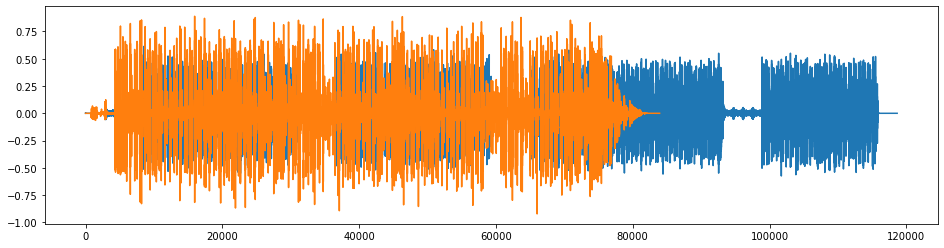

In [38]:
rcParams['figure.figsize'] = 16,4

winsmooth = 100
ysmooth = pd.Series(abs(y)).rolling(window=winsmooth).mean()

samples = [winsmooth*i for i in range(len(ysmooth)//winsmooth)]

plot(y)
plot(y2)
show()

In [7]:
import os
import glob
# files                                                                         
lst = glob.glob("nostre_features/*.csv")
print(lst)

out = open('nostre_features/complessivo_rms.csv', 'w')

f = open(lst[0], 'r')
lines = f.readlines()
out.write(lines[0]+"\n")
f.close()
 
for file in tq.tqdm(lst):
    f = open(file, 'r')
    out.writelines(f.readlines()[1:])
    f.close()
    
out.close()

['nostre_features\\0-4440.csv', 'nostre_features\\102120-106560.csv', 'nostre_features\\106560-106574.csv', 'nostre_features\\13320-17760.csv', 'nostre_features\\17760-22200.csv', 'nostre_features\\22200-26640.csv', 'nostre_features\\26640-31080.csv', 'nostre_features\\31080-35520.csv', 'nostre_features\\35520-39960.csv', 'nostre_features\\39960-44400.csv', 'nostre_features\\4440-8880.csv', 'nostre_features\\44400-48840.csv', 'nostre_features\\48840-53280.csv', 'nostre_features\\53280-57720.csv', 'nostre_features\\57720-62160.csv', 'nostre_features\\62160-66600.csv', 'nostre_features\\66600-71040.csv', 'nostre_features\\71040-75480.csv', 'nostre_features\\75480-79920.csv', 'nostre_features\\79920-84360.csv', 'nostre_features\\84360-88800.csv', 'nostre_features\\8880-13320.csv', 'nostre_features\\88800-93240.csv', 'nostre_features\\93240-97680.csv', 'nostre_features\\97680-102120.csv']


<_io.BufferedRandom name='mp3_medium/000/_000002.wav'>

In [9]:
df_letto = pd.read_csv("nostre_features/complessivo_rms.csv", index_col="id")

In [10]:
df_letto

,error,duration,0,1,2,3,4,5,6,7,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
id,,,,,,,,,,,,,,,,,,,,,
2,0,29.976599,0.005965,0.030530,0.038409,0.052510,0.081335,0.096664,0.092021,0.083451,...,0.167174,0.126127,0.111858,0.095006,0.099327,0.097803,0.107587,0.152822,0.177150,0.000000
3,0,30.002721,0.009710,0.088201,0.120011,0.128533,0.150989,0.169258,0.205793,0.261233,...,0.126499,0.103162,0.147984,0.207548,0.256682,0.254089,0.194205,0.146202,0.119663,0.121850
5,0,30.002721,0.004292,0.036312,0.051975,0.046670,0.203390,0.283229,0.314644,0.322023,...,0.318426,0.312173,0.305558,0.281919,0.234308,0.178978,0.163058,0.143980,0.120217,0.107188
10,0,29.976599,0.110271,0.142744,0.156790,0.131847,0.125279,0.129176,0.128395,0.171358,...,0.296138,0.217364,0.184314,0.176318,0.161866,0.158079,0.158619,0.148111,0.146005,0.000000
20,0,29.976599,0.245351,0.239747,0.211342,0.181047,0.184478,0.177384,0.142504,0.206317,...,0.333991,0.285059,0.176683,0.181024,0.188473,0.168699,0.164692,0.181571,0.183699,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148531,0,30.002721,0.001064,0.139863,0.285323,0.358522,0.354882,0.344089,0.350930,0.354439,...,0.184819,0.160418,0.151545,0.146888,0.138215,0.119840,0.102987,0.096249,0.101294,0.101571
148532,0,30.002721,0.113682,0.140370,0.174816,0.156530,0.138253,0.154064,0.124616,0.088983,...,0.102905,0.141901,0.155313,0.148111,0.123048,0.092014,0.078849,0.081330,0.089113,0.154397
148533,0,29.976599,0.032391,0.207498,0.294543,0.283336,0.260513,0.264380,0.304894,0.316093,...,0.308431,0.333682,0.363609,0.356325,0.325184,0.337192,0.363257,0.342470,0.327824,0.000000


In [11]:
df_letto = df_letto.drop(columns=["error", "duration"])

df_letto

,0,1,2,3,4,5,6,7,8,9,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
id,,,,,,,,,,,,,,,,,,,,,
2,0.005965,0.030530,0.038409,0.052510,0.081335,0.096664,0.092021,0.083451,0.083296,0.086539,...,0.167174,0.126127,0.111858,0.095006,0.099327,0.097803,0.107587,0.152822,0.177150,0.000000
3,0.009710,0.088201,0.120011,0.128533,0.150989,0.169258,0.205793,0.261233,0.279276,0.259404,...,0.126499,0.103162,0.147984,0.207548,0.256682,0.254089,0.194205,0.146202,0.119663,0.121850
5,0.004292,0.036312,0.051975,0.046670,0.203390,0.283229,0.314644,0.322023,0.293859,0.251127,...,0.318426,0.312173,0.305558,0.281919,0.234308,0.178978,0.163058,0.143980,0.120217,0.107188
10,0.110271,0.142744,0.156790,0.131847,0.125279,0.129176,0.128395,0.171358,0.298087,0.304533,...,0.296138,0.217364,0.184314,0.176318,0.161866,0.158079,0.158619,0.148111,0.146005,0.000000
20,0.245351,0.239747,0.211342,0.181047,0.184478,0.177384,0.142504,0.206317,0.242042,0.226818,...,0.333991,0.285059,0.176683,0.181024,0.188473,0.168699,0.164692,0.181571,0.183699,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148531,0.001064,0.139863,0.285323,0.358522,0.354882,0.344089,0.350930,0.354439,0.347290,0.333155,...,0.184819,0.160418,0.151545,0.146888,0.138215,0.119840,0.102987,0.096249,0.101294,0.101571
148532,0.113682,0.140370,0.174816,0.156530,0.138253,0.154064,0.124616,0.088983,0.088400,0.087699,...,0.102905,0.141901,0.155313,0.148111,0.123048,0.092014,0.078849,0.081330,0.089113,0.154397
148533,0.032391,0.207498,0.294543,0.283336,0.260513,0.264380,0.304894,0.316093,0.299927,0.306783,...,0.308431,0.333682,0.363609,0.356325,0.325184,0.337192,0.363257,0.342470,0.327824,0.000000


In [13]:
df_letto.to_csv("complessivo_rms_finale.csv")

In [53]:
df_letto = df_letto.astype(int)

df_letto



,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
id,,,,,,,,,,,,,,,,,,,,,
2,15,15,15,15,15,15,15,16,14,15,...,31,13,1,0,26,31,31,27,0,0
3,15,15,15,15,15,16,15,14,13,24,...,16,15,14,17,14,15,18,14,16,16
5,15,15,15,15,15,15,16,16,16,13,...,24,22,18,17,10,19,17,21,18,13
10,15,16,16,16,15,14,12,22,10,15,...,20,13,13,18,19,14,11,19,16,12
20,16,16,20,22,10,0,0,17,29,31,...,3,6,24,17,19,23,13,12,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148531,15,15,15,15,15,15,15,15,15,12,...,15,13,17,11,23,12,17,11,23,7
148532,15,15,16,15,17,10,7,29,3,22,...,1,31,1,27,5,24,7,22,22,2
148533,15,15,15,15,15,15,16,18,17,7,...,23,6,17,21,9,16,22,9,17,23


In [55]:
df_letto.to_csv("ts_pronte_si_spera.csv.zip", compression="zip")

In [7]:
path = 'nostre_features/' #Per rimuovere i file dalle cartelle: find . -name "*.mp3" -exec mv {} . \;
entries = os.listdir(path)

In [9]:
df = pd.read_csv("flat_df_no_nulli_no_out.csv")

In [12]:
df[df.TRACK_genre_top == "Rock"]

,track_id,ALBUM_date_released_year,ALBUM_favorites,ALBUM_type,ALBUM_tags,ALBUM_tracks,ALBUM_listens,ALBUM_title,SET_subset,ARTIST_favorites,...,spectral_contrastskew,spectral_contraststd,tonnetzkurtosis,tonnetzmax,tonnetzmean,tonnetzmedian,tonnetzmin,tonnetzskew,tonnetzstd,ARTIST_location_
10,135,2009.0,0.0,Single Tracks,[],4.0,3331.0,mp3,large,0.0,...,-0.421474,-2.669983,0.585669,0.069293,0.018128,-0.018164,0.024882,-0.014318,-0.010465,NaN
11,136,2009.0,0.0,Single Tracks,[],4.0,3331.0,mp3,medium,0.0,...,-1.842774,-1.112859,-1.861904,-0.177090,-0.107968,0.101598,-0.019009,-0.156635,-0.039749,NaN
25,151,2009.0,0.0,Album,[],2.0,244.0,Make Them Suffer,large,0.0,...,-0.989360,-2.635937,1.039300,0.038040,-0.011802,0.012237,-0.034295,0.076656,-0.044032,North America
26,152,2009.0,0.0,Album,[],2.0,244.0,Make Them Suffer,large,0.0,...,-0.055038,-1.632651,-1.586569,-0.115180,0.026070,-0.018218,0.108663,0.179659,-0.051202,North America
27,153,2005.0,0.0,Album,[],2.0,628.0,Arc and Sender,large,0.0,...,-1.058086,-1.614506,-0.997559,-0.036904,0.030757,-0.028029,0.009081,-0.069510,-0.045961,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104466,155315,2017.0,0.0,Live Performance,[],6.0,1506.0,"Live at Monty Hall, 2/17/2017",large,0.0,...,0.168924,0.896165,-1.260438,-0.059327,0.022795,-0.011546,0.097424,0.618452,0.003335,North America
104467,155316,2017.0,0.0,Live Performance,[],6.0,1506.0,"Live at Monty Hall, 2/17/2017",large,0.0,...,-0.376255,-1.297131,-0.902569,-0.010471,0.090281,-0.104228,-0.123058,0.233260,0.021846,North America
104468,155317,2017.0,0.0,Live Performance,[],6.0,1506.0,"Live at Monty Hall, 2/17/2017",large,0.0,...,0.339166,0.528187,-1.008135,0.155377,-0.135316,0.154183,-0.131252,-0.439485,0.051446,North America
104469,155318,2017.0,0.0,Live Performance,[],6.0,1506.0,"Live at Monty Hall, 2/17/2017",large,0.0,...,0.009937,-0.882132,-0.492957,0.030095,0.042125,-0.049494,-0.081322,-0.305773,-0.001345,North America
